Using cpu device to train


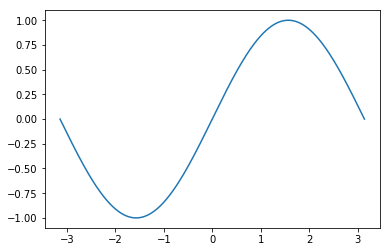

<Figure size 432x288 with 0 Axes>

loss: 0.5513278841972351 0


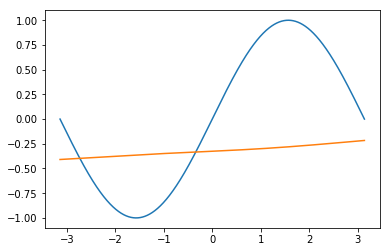

loss: 0.057095762342214584 100


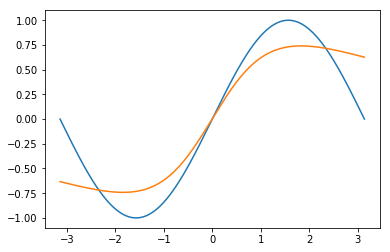

loss: 0.012765650637447834 200


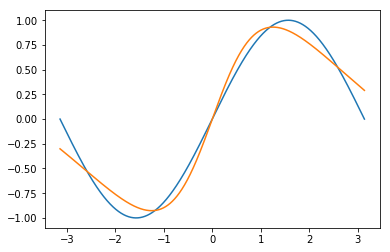

loss: 0.008684714324772358 300


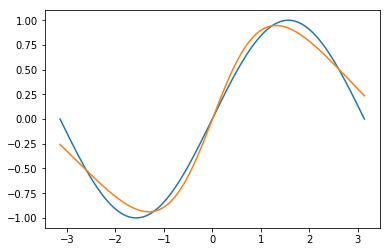

loss: 0.00512700155377388 400


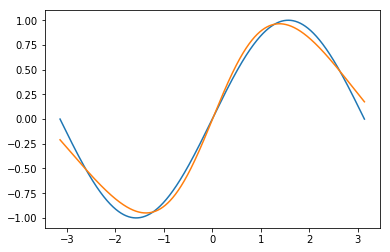

loss: 0.0022499500773847103 500


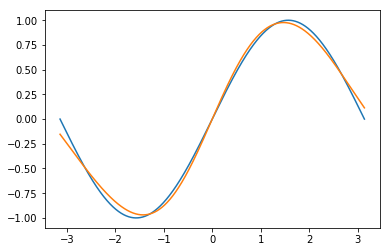

loss: 0.0006892567616887391 600


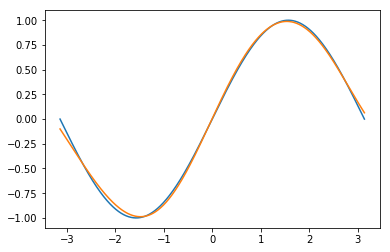

loss: 0.00018491485388949513 700


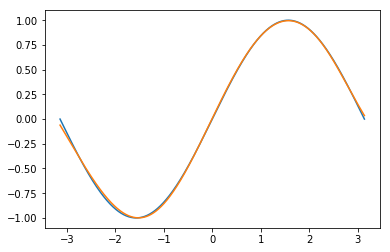

loss: 6.376419332809746e-05 800


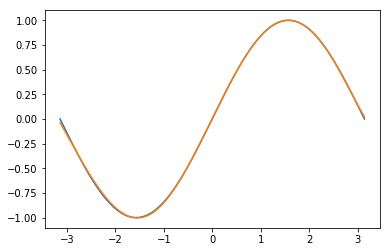

loss: 2.6463621907169e-05 900


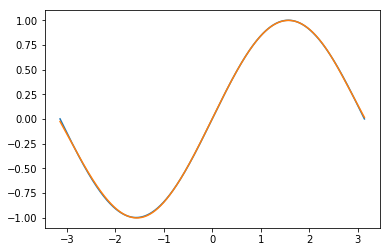

loss: 1.2653583326027729e-05 1000


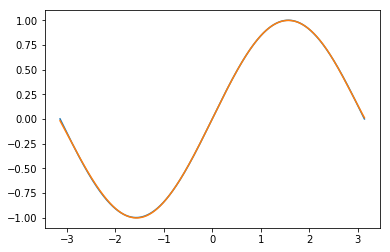

loss: 7.203013410617132e-06 1100


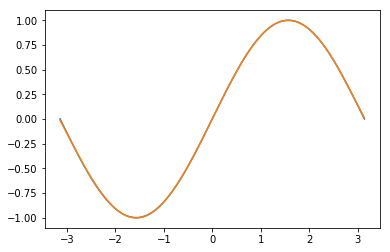

loss: 6.5746157815738115e-06 1200


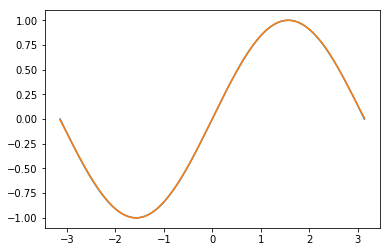

loss: 3.8270318327704445e-06 1300


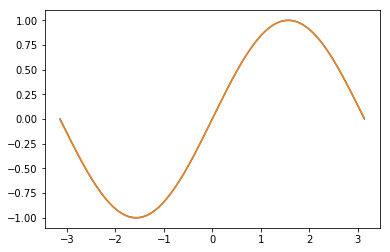

loss: 0.0001443268556613475 1400


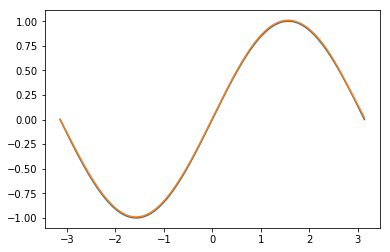

loss: 2.8369540814310312e-06 1500


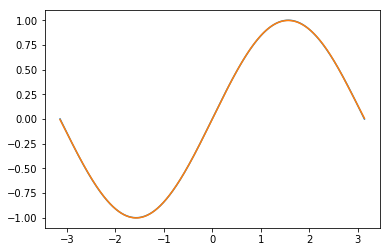

loss: 3.7120102206245065e-05 1600


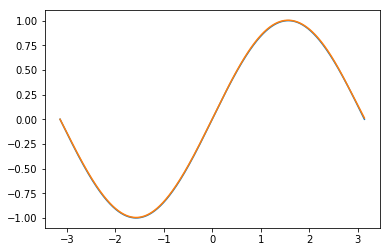

loss: 2.427305616947706e-06 1700


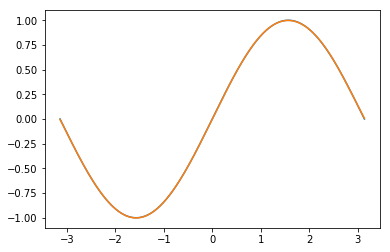

loss: 2.2562830963579472e-06 1800


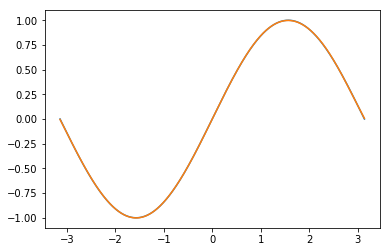

loss: 2.745849542407086e-06 1900


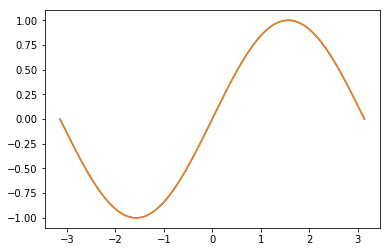

loss: 2.0770660285052145e-06 2000


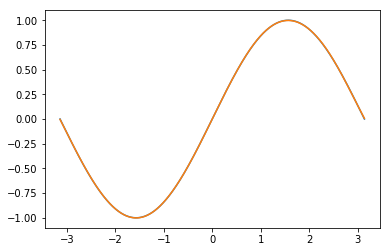

loss: 0.0006569590186700225 2100


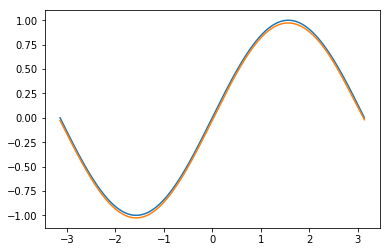

loss: 2.1366338387451833e-06 2200


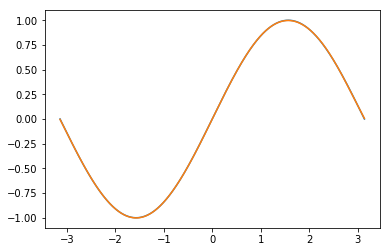

loss: 1.8739018514679628e-06 2300


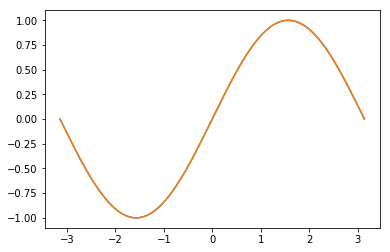

loss: 1.8868282495532185e-05 2400


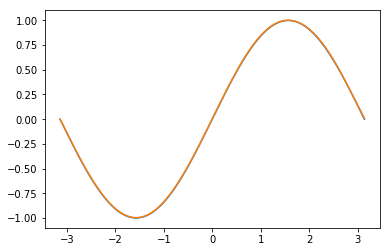

loss: 1.7888652337205713e-06 2500


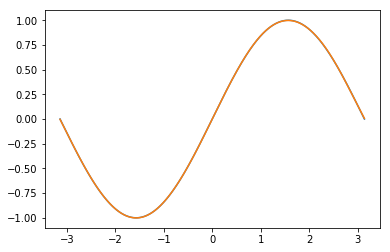

loss: 1.7292300071858335e-06 2600


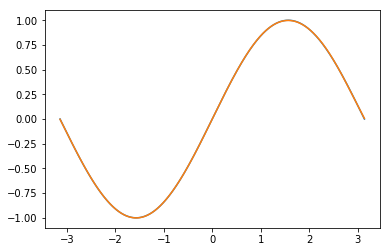

loss: 0.00022785029432270676 2700


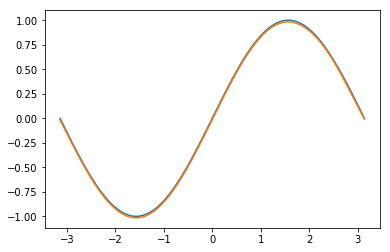

loss: 1.6818962649267633e-06 2800


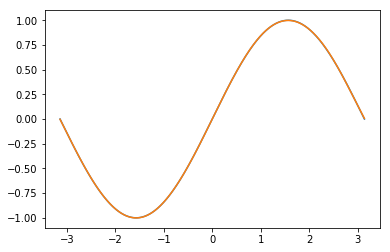

loss: 1.6322525198120275e-06 2900


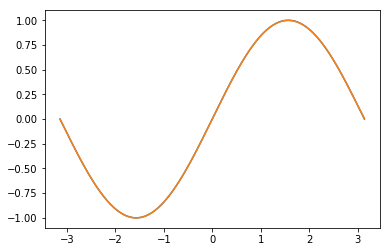

Saved PyTorch Model State to model.pth


In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
%matplotlib inline

# 生成训练数据用的数据
x = torch.linspace(-torch.pi,torch.pi,10000) #(1000, )
x = torch.unsqueeze(input=x, dim=1)  # (1000, 1)
y = torch.sin(x)  # (1000, 1)

plt.plot(x.numpy(),y.numpy())


# 如果可以用cuda就在cuda上运行，这样会快很多
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device to train")

x = x.to(device)
y = y.to(device)

# 定义NN模型，继承自nn.Module
class NeuralNetwork(nn.Module):
    def __init__(self):
        # 调用
        super(NeuralNetwork, self).__init__()
        #
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 70),
            nn.Sigmoid(),
            nn.Linear(70,1)
        )
        
    def forward(self, x):
        y_pred = self.linear_relu_stack(x)
        return y_pred
        

# 把模型放到GPU上训练  
model = NeuralNetwork().to(device) 
#均方差做损失函数
loss_fn = nn.MSELoss()  
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
#用下面这个Adam优化器会收敛的快很多
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 迭代3000次
batches = 3000

plt.figure("regression")                     #新建一张画布，打印数据点和预测值
plt.ion() #开启交互模式
plt.show()
for i in range(batches):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        loss, batch = loss.item(), i
        print(f'loss: {loss} {batch}')
        plt.cla()
        plt.plot(x.cpu().numpy(), y.cpu().numpy())
        plt.plot(x.cpu().numpy(), y_pred.detach().cpu().numpy())
        plt.pause(0.001)
        plt.show()
# 保存
# torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

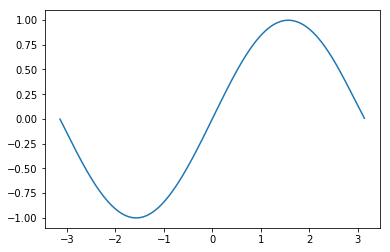

In [2]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        # 调用
        super(NeuralNetwork, self).__init__()
        #
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 70),
            nn.Sigmoid(),
            nn.Linear(70,1)
        )
        
    def forward(self, x):
        y_pred = self.linear_relu_stack(x)
        return y_pred

x = torch.linspace(-torch.pi,torch.pi,10000) #(1000, )
x = torch.unsqueeze(input=x, dim=1)  # (1000, 1)
        
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

y = model(x)

plt.plot(x.numpy(), y.detach().numpy())
plt.show()

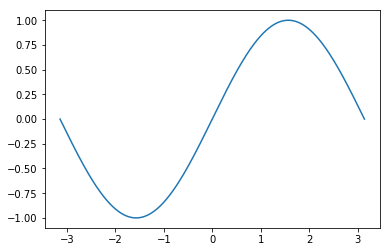

In [3]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
# 生成训练数据用的数据
x = torch.linspace(-torch.pi,torch.pi,10000) #(1000, )
x = torch.unsqueeze(input=x, dim=1)  # (1000, 1)
y = torch.sin(x)  # (1000, 1)
plt.plot(x.numpy(),y.numpy())